# The Battle of Neighborhoods (Week 2)

## Table of Contents

1.Introduction: Business Problem

2.Explore Dataset

3.Methodology

4.Results

5.Discussion

6.Conclusion

## 1:- Introduction : Business Problem

### Problem Statement: Finding a good Neighborhood for opening an Indian Restaurant in New Delhi, IN
This study aims at helping people planning on opening an Indian Restaurant in the New Delhi,IN area by choosing the right location by providing data about Neighborhoods and nearby competitors. New Delhi is an urban district located in the city of Delhi which serves as the capital of India. New Delhi is the largest commercial city in northern India.

### Target Audience:
1- Working From Home Population ordering meal-ready meals looking for a nearby meal-prepping restaurant.

2- Freelancers looking into opening a restaurant. This will provide an analysis whether the venture is feasible or not.

##### Importing Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


## 2:- Explore Dataset

Delhi has a total of 9 boroughs and 163 neighborhoods. In order to analyse the neighborhoods and explore them, we will essentially need a dataset that contains the 9 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the Kaggle's website, here is the link to the dataset: https://www.kaggle.com/shaswatd673/delhi-neighborhood-data#delhi_dataSet.csv

In [2]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Borough,Neighborhood,latitude,longitude
0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,North West Delhi,Begum Pur,NaN,NaN


In [3]:
df_delhi.drop('Unnamed: 0', axis = 1, inplace= True)

In [4]:
df_delhi.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,NaN,NaN


In [5]:
df_delhi=df_delhi.dropna()
df_delhi.head(6)

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
5,North West Delhi,Dhaka,39.031714,-90.261223
6,North West Delhi,Jahangirpuri,28.725972,77.162658


##### Print the boroughs and neighborhoods for dataframe

In [6]:

print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_delhi['Borough'].unique()),
        df_delhi.shape[0]
    )
)

The dataframe has 9 boroughs and 163 neighborhoods.


##### Use geopy library to get the latitude and longitude values of Delhi

In [7]:
address = 'Delhi, IN'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


##### Create map of Delhi using latitude and longitude values

In [8]:

map_delhi= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_delhi['latitude'], df_delhi['longitude'], df_delhi['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

## 3:-Methodology

In this section, we will conduct exploratory data analysis. We have New Delhi area to explore neighborhood and check the competition for Indian Restaurant.
We will get information on common venes in New Delhi with the help of Foursquare API.
We will also be using K-means clustering.

let's simplify the above map and segment and cluster only the neighborhoods in New Delhi. So let's slice the original dataframe and create a new dataframe of the New Delhi data.

In [9]:
ND_data =df_delhi[df_delhi['Borough'] == 'New Delhi'].reset_index(drop=True)
ND_data.head()

,Borough,Neighborhood,latitude,longitude
0,New Delhi,Barakhamba Road,28.629142,77.226149
1,New Delhi,Chanakyapuri,28.594678,77.188521
2,New Delhi,Connaught Place,28.631383,77.219792
3,New Delhi,Gautampuri,28.511570,77.302623
4,New Delhi,Gole Market,28.633719,77.205627


Let's get the geographical coordinates of New Delhi.

In [10]:
address = 'New Delhi, IN'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address) 
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North East Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North East Delhi are 28.6138954, 77.2090057.


##### Create map of New Delhi using latitude and longitude values

In [11]:

map_ND= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ND_data['latitude'], ND_data['longitude'], ND_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ND)  
    
map_ND

##### Define Foursquare Credentials and Version

In [12]:

#utilizing the Foursquare API to explore the neighborhoods


CLIENT_ID = 'QJWL3DNWSTUVOO1BHEQB4HAIQ3BGUEW3NPQGKYZBDD320Y21' # your Foursquare ID
CLIENT_SECRET = 'SAK1UAJFLQHYNREZ0K1VEJWYFP0LK3TKNTP22YNYWDPRUGN5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QJWL3DNWSTUVOO1BHEQB4HAIQ3BGUEW3NPQGKYZBDD320Y21
CLIENT_SECRET:SAK1UAJFLQHYNREZ0K1VEJWYFP0LK3TKNTP22YNYWDPRUGN5


##### Explore neighborhood in New Delhi

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT = 30):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# Now run the above function on each neighborhood and create a new dataframe called ND_venues.

ND_venues = getNearbyVenues(names=ND_data['Neighborhood'],
                                   latitudes=ND_data['latitude'],
                                   longitudes=ND_data['longitude']
                              )

Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Pragati Maidan


In [15]:
print(ND_venues.shape)
ND_venues

(184, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barakhamba Road,28.629142,77.226149,Bengali Market | बंगाली मार्केट | বাংলা বাজার,28.629498,77.232020,Indian Restaurant
1,Barakhamba Road,28.629142,77.226149,Naturals Ice Cream,28.634455,77.222139,Ice Cream Shop
2,Barakhamba Road,28.629142,77.226149,Connaught Place | कनॉट प्लेस (Connaught Place),28.632731,77.220018,Plaza
3,Barakhamba Road,28.629142,77.226149,Chaayos,28.631629,77.220364,Café
4,Barakhamba Road,28.629142,77.226149,Rajdhani Thali,28.629999,77.220401,Indian Restaurant
5,Barakhamba Road,28.629142,77.226149,Farzi Cafe,28.632581,77.221125,Molecular Gastronomy Restaurant
6,Barakhamba Road,28.629142,77.226149,Ugrasen ki Baoli (Agrasen ki Baoli),28.625820,77.224955,Historic Site
7,Barakhamba Road,28.629142,77.226149,The Imperial,28.625548,77.218664,Hotel
8,Barakhamba Road,28.629142,77.226149,HOTEL SARAVANA BHAVAN,28.627041,77.219514,South Indian Restaurant
9,Barakhamba Road,28.629142,77.226149,United Coffee House,28.632477,77.221120,Indian Restaurant


In [16]:
# to check how many venues were returned for each neighborhood
ND_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barakhamba Road,30,30,30,30,30,30
Chanakyapuri,24,24,24,24,24,24
Connaught Place,30,30,30,30,30,30
Gautampuri,5,5,5,5,5,5
Gole Market,8,8,8,8,8,8
Golf Links,30,30,30,30,30,30
INA Colony,12,12,12,12,12,12
Khan Market,30,30,30,30,30,30
Pragati Maidan,15,15,15,15,15,15


In [17]:
print('There are {} uniques categories.'.format(len(ND_venues['Venue Category'].unique())))

There are 60 uniques categories.


#### Analyze Each Neighborhood

In [18]:
# one hot encoding
ND_onehot = pd.get_dummies(ND_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ND_onehot['Neighborhood'] = ND_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ND_onehot.columns[-1]] + list(ND_onehot.columns[:-1])
ND_onehot = ND_onehot[fixed_columns]

ND_onehot.head()

,Neighborhood,Airport,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dessert Shop,Flea Market,Food Truck,French Restaurant,Furniture / Home Store,Gastropub,Golf Course,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irani Cafe,Italian Restaurant,Japanese Restaurant,Karnataka Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Nightclub,North Indian Restaurant,Park,Performing Arts Venue,Plaza,Pool,Portuguese Restaurant,Pub,Restaurant,Salon / Barbershop,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Theater,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,Barakhamba Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barakhamba Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barakhamba Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barakhamba Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Barakhamba Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
ND_onehot.shape

(184, 61)

##### let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:

ND_grouped = ND_onehot.groupby('Neighborhood').mean().reset_index()
ND_grouped

,Neighborhood,Airport,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dessert Shop,Flea Market,Food Truck,French Restaurant,Furniture / Home Store,Gastropub,Golf Course,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irani Cafe,Italian Restaurant,Japanese Restaurant,Karnataka Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Nightclub,North Indian Restaurant,Park,Performing Arts Venue,Plaza,Pool,Portuguese Restaurant,Pub,Restaurant,Salon / Barbershop,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Theater,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,Barakhamba Road,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.033333,0.066667,0.033333,0.033333,0.000000,0.000000,0.000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.066667,0.000000,0.033333,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.033333,0.033333,0.000000,0.000000,0.000000
1,Chanakyapuri,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.083333,0.083333,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.166667,0.000000,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.125,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.041667,0.041667,0.00,0.000000,0.000000,0.000000,0.000000,0.041667
2,Connaught Place,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.000,0.100000,0.033333,0.033333,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.066667,0.000000,0.000000,0.000000,0.000000
3,Gautampuri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.20,0.000000,0.000000,0.400000,0.000000,0.000000
4,Gole Market,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
5,Golf Links,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.066667,0.033333,0.000,0.100000,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.100000,0.033333,0.000000,0.100000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0

In [21]:
ND_grouped.shape

(9, 61)

##### Function to sort the venues in descending order

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Let's create the new dataframe and display the top 9 venues for each neighborhood.

In [23]:
num_top_venues = 9

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ND_grouped['Neighborhood']

for ind in np.arange(ND_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ND_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Barakhamba Road,Indian Restaurant,Hotel,Lounge,Café,Bakery,Plaza,Gastropub,Ice Cream Shop,Coffee Shop
1,Chanakyapuri,Indian Restaurant,Nightclub,Café,Chinese Restaurant,Park,Asian Restaurant,Coffee Shop,Hotel,Italian Restaurant
2,Connaught Place,Indian Restaurant,Café,South Indian Restaurant,Lounge,Bistro,Gastropub,Ice Cream Shop,Food Truck,Flea Market
3,Gautampuri,Indian Restaurant,Train Station,Snack Place,Café,Hotel,Historic Site,Golf Course,Gastropub,Furniture / Home Store
4,Gole Market,Snack Place,Indian Restaurant,Japanese Restaurant,Light Rail Station,Bar,Breakfast Spot,Hotel,Coffee Shop,Historic Site


##### Transform dataframe for clustering

In [24]:
ND_grouped_clustering =ND_grouped.drop('Neighborhood', axis=1)

####  Find optimum k value for k-means clustering

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in 

Text(0, 0.5, 'Inertia')

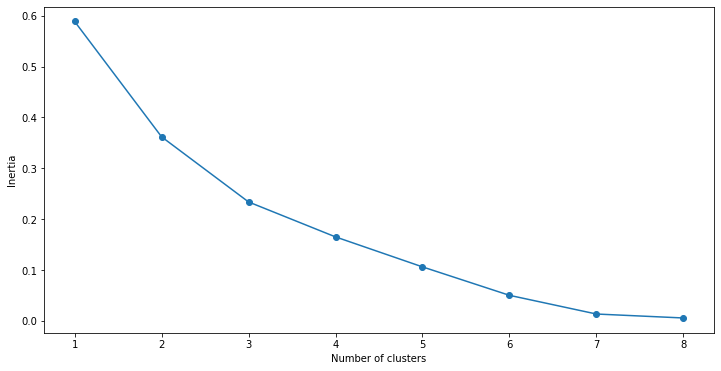

In [25]:
SSE = []
for cluster in range(1,9):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(ND_grouped_clustering)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,9), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

When we changed the cluster value from 1 to 3, the inertia value reduced very sharply. This decrease in the inertia value reduces and eventually becomes constant as we increase the number of clusters further. Here, we can choose any number of clusters between 4 and 8. We can have 5, 6, or even 8 clusters. We must also look at the computation cost while deciding the number of clusters. If we increase the number of clusters, the computation cost will also increase. So, We will now run K-means clustering for K=4.

#### Cluster the neighborhood into 4 clusters

In [26]:
kclusters = 4

ND_grouped_clustering = ND_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ND_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 1, 0, 0, 0, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 9 venues for each neighborhood.

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_ )

ND_merged = ND_data

# merge ND_grouped with toronto_data to add latitude/longitude for each neighborhood
ND_merged = ND_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ND_merged.head() # check the last columns!

,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,New Delhi,Barakhamba Road,28.629142,77.226149,0,Indian Restaurant,Hotel,Lounge,Café,Bakery,Plaza,Gastropub,Ice Cream Shop,Coffee Shop
1,New Delhi,Chanakyapuri,28.594678,77.188521,0,Indian Restaurant,Nightclub,Café,Chinese Restaurant,Park,Asian Restaurant,Coffee Shop,Hotel,Italian Restaurant
2,New Delhi,Connaught Place,28.631383,77.219792,0,Indian Restaurant,Café,South Indian Restaurant,Lounge,Bistro,Gastropub,Ice Cream Shop,Food Truck,Flea Market
3,New Delhi,Gautampuri,28.511570,77.302623,2,Indian Restaurant,Train Station,Snack Place,Café,Hotel,Historic Site,Golf Course,Gastropub,Furniture / Home Store
4,New Delhi,Gole Market,28.633719,77.205627,1,Snack Place,Indian Restaurant,Japanese Restaurant,Light Rail Station,Bar,Breakfast Spot,Hotel,Coffee Shop,Historic Site


In [28]:
ND_merged= ND_merged.dropna()

In [29]:
ND_merged['Cluster Labels'].round(0)

0    0
1    0
2    0
3    2
4    1
5    0
6    0
7    0
8    3
Name: Cluster Labels, dtype: int32

In [30]:
ND_merged['Cluster Labels'] = ND_merged['Cluster Labels'].astype(int)

In [31]:
ND_merged.head(10)

,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,New Delhi,Barakhamba Road,28.629142,77.226149,0,Indian Restaurant,Hotel,Lounge,Café,Bakery,Plaza,Gastropub,Ice Cream Shop,Coffee Shop
1,New Delhi,Chanakyapuri,28.594678,77.188521,0,Indian Restaurant,Nightclub,Café,Chinese Restaurant,Park,Asian Restaurant,Coffee Shop,Hotel,Italian Restaurant
2,New Delhi,Connaught Place,28.631383,77.219792,0,Indian Restaurant,Café,South Indian Restaurant,Lounge,Bistro,Gastropub,Ice Cream Shop,Food Truck,Flea Market
3,New Delhi,Gautampuri,28.511570,77.302623,2,Indian Restaurant,Train Station,Snack Place,Café,Hotel,Historic Site,Golf Course,Gastropub,Furniture / Home Store
4,New Delhi,Gole Market,28.633719,77.205627,1,Snack Place,Indian Restaurant,Japanese Restaurant,Light Rail Station,Bar,Breakfast Spot,Hotel,Coffee Shop,Historic Site
5,New Delhi,Golf Links,28.595970,77.231163,0,Indian Restaurant,Restaurant,Café,Hotel,Coffee Shop,Bookstore,Dessert Shop,Hotel Bar,Golf Course
6,New Delhi,INA Colony,28.579472,77.212451,0,Indian Restaurant,Restaurant,Antique Shop,Athletics & Sports,Bakery,Coffee Shop,Market,Metro Station,Airport
7,New Delhi,Khan Market,28.600135,77.226491,0,Indian Restaurant,Café,Restaurant,Coffee Shop,Bookstore,Chinese Restaurant,Mexican Restaurant,Boutique,Mediterranean Restaurant
8,New Delhi,Pragati Maidan,28.623459,77.242512,3,Theater,Indian Restaurant,Train Station,Clothing Store,Udupi Restaurant,Furniture / Home Store,Art Museum,Coffee Shop,Café


## 4:- Results

#### Finally, let's visualize the resulting clusters

In [32]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ND_merged['latitude'], ND_merged['longitude'], ND_merged['Neighborhood'], ND_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

##### Cluster 1

In [33]:
ND_merged.loc[ND_merged['Cluster Labels'] == 0, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Barakhamba Road,Indian Restaurant,Hotel,Lounge,Café,Bakery,Plaza,Gastropub,Ice Cream Shop,Coffee Shop
1,Chanakyapuri,Indian Restaurant,Nightclub,Café,Chinese Restaurant,Park,Asian Restaurant,Coffee Shop,Hotel,Italian Restaurant
2,Connaught Place,Indian Restaurant,Café,South Indian Restaurant,Lounge,Bistro,Gastropub,Ice Cream Shop,Food Truck,Flea Market
5,Golf Links,Indian Restaurant,Restaurant,Café,Hotel,Coffee Shop,Bookstore,Dessert Shop,Hotel Bar,Golf Course
6,INA Colony,Indian Restaurant,Restaurant,Antique Shop,Athletics & Sports,Bakery,Coffee Shop,Market,Metro Station,Airport
7,Khan Market,Indian Restaurant,Café,Restaurant,Coffee Shop,Bookstore,Chinese Restaurant,Mexican Restaurant,Boutique,Mediterranean Restaurant


##### Cluster 2

In [34]:
ND_merged.loc[ND_merged['Cluster Labels'] == 1, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
4,Gole Market,Snack Place,Indian Restaurant,Japanese Restaurant,Light Rail Station,Bar,Breakfast Spot,Hotel,Coffee Shop,Historic Site


##### Cluster 3

In [35]:
ND_merged.loc[ND_merged['Cluster Labels'] == 2, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
3,Gautampuri,Indian Restaurant,Train Station,Snack Place,Café,Hotel,Historic Site,Golf Course,Gastropub,Furniture / Home Store


##### Cluster 4

In [36]:
ND_merged.loc[ND_merged['Cluster Labels'] == 3, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
8,Pragati Maidan,Theater,Indian Restaurant,Train Station,Clothing Store,Udupi Restaurant,Furniture / Home Store,Art Museum,Coffee Shop,Café


Here, We can clearly see that Cluster 1 is the cluster with the restaurants as the most common venue.


We will plot the mean value of Indian restaurants for each selected neighborhood in the cluster to study the presence of competition in each neighborhood.

In [37]:
ND_grouped_select = pd.DataFrame()
ND_grouped_select['Neighborhood'] = ND_merged['Neighborhood']

ND_grouped_select = ND_grouped_select.join(ND_grouped.set_index('Neighborhood'), on='Neighborhood')
ND_grouped_select.dropna(inplace=True)
ND_grouped_select.sort_values('Indian Restaurant',ascending=False,inplace=True)

print(ND_grouped_select.shape)
ND_grouped_select.head()

(9, 61)


,Neighborhood,Airport,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Dessert Shop,Flea Market,Food Truck,French Restaurant,Furniture / Home Store,Gastropub,Golf Course,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irani Cafe,Italian Restaurant,Japanese Restaurant,Karnataka Restaurant,Light Rail Station,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Nightclub,North Indian Restaurant,Park,Performing Arts Venue,Plaza,Pool,Portuguese Restaurant,Pub,Restaurant,Salon / Barbershop,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Theater,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant
3,Gautampuri,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.400000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.400000,0.0,0.000000
6,INA Colony,0.083333,0.083333,0.000000,0.000000,0.0,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.083333,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.083333,0.000000,0.083333,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.083333,0.0,0.000000
0,Barakhamba Road,0.000000,0.000000,0.033333,0.033333,0.0,0.033333,0.000000,0.033333,0.066667,0.033333,0.033333,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.033333,0.0,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.033333,0.066667,0.0,0.033333,0.200000,0.0,0.000000,0.0,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.0,0.033333,0.000000,0.000,0.000000,0.000000,0.0,0.033333,0.0,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.0,0.033333,0.033333,0.000000,0.0,0.000000
2,Connaught Place,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.0,0.0,0.0,0.100000,0.033333,0.033333,0.033333,0.0,0.033333,0.033333,0.0,0.0,0.033333,0.0,0.000000,0.033333,0.0,0.033333,0.200000,0.0,0.000000,0.0,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.0,0.033333,0.000000,0.000,0.033333,0.000000,0.0,0.033333,0.0,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.0,0.066667,0.000000,0.000000,0.0,0.000000
1,Chanakyapuri,0.000000,0.000000,0.000000,0.000000,0.0,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.083333,0.083333,0.000000,0.041667,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.041667,0.0,0.000000,0.166667,0.0,0.041667,0.0,0.041667,0.0,0.000000,0.000000,0.041667,0.000000,0.0,0.000000,0.041667,0.125,0.000000,0.041667,0.0,0.000000,0.0,0.000000,0.041667,0.041667,0.000000,0.041667,0.041667,0.0,0.000000,0.000000,0.000000,0.0,0.041667


#### There are 9 neighborhoods in New Delhi, we will use to get the average venues data

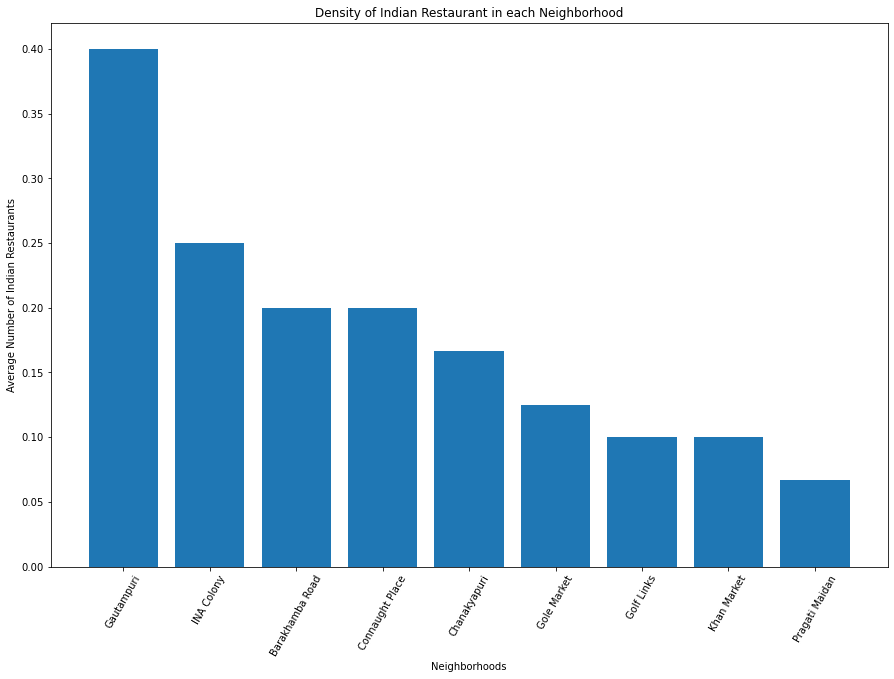

In [38]:
label = list(ND_grouped_select['Neighborhood'])
height = list(ND_grouped_select['Indian Restaurant'])

index = np.arange(len(label))

plt.figure(figsize=(15,10))
plt.bar(index,height)
plt.xlabel('Neighborhoods')
plt.ylabel('Average Number of Indian Restaurants')
plt.xticks(rotation=60)
plt.xticks(index,label)
plt.title('Density of Indian Restaurant in each Neighborhood')
plt.show()

## 5:- Discussion

From the graph, we can see that the first neighborhood, Gautampuri, has the most competition for Indian Restaurants in New Delhi. This indicating that it has the greatest obstacles in opening a new restaurant. Gautampuri has almost double the competition than any other neighborhoods. Connaught Place is the second neighborhood with the most Indian restaurants, followed by INA Colony. Barakhamba Road and Chanakyapuri has almost same but moderate competition. However, the following neighborhoods have moderate competition, which will enable a new business to establish easily:

Gole Market	

Golf Links

Khan Market

Pragati Maidan

Note that these recommendations are based on some assumptions of the analysis,like:

1- radius of the oppourtunity of each neighborhood was considered as 1000 meters from the location,

2- recommendation opportunities are based on absence of a restaurant which is likely to be appreciated in the top 9 venues

## 6:- Conclusion

This project recommends some of the ideal places to open Indian restaurant in New Delhi, India.The analysis shows there are better chances for opening restaurant in Gole Market,Golf Links,Khan Market, and Pragati Maidan.INA Colony, Barakhamba Road and Chanakyapuri are also good location. This analysis can be helpful for the individuals looking for opening a restaurant or expanding business. This analysis shows the feasible venture and competion landscape of the area.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location , levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.